# **How Many Soldiers Do You Need To Beat The Night King?**
## [Riddler Classic, May 17, 2019](https://fivethirtyeight.com/features/how-many-soldiers-do-you-need-to-beat-the-night-king/)

### solution by [Laurent Lessard](https://laurentlessard.com)

Here is my solution:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
N = 20000;  # takes several minutes --- pick a smaller value for faster run-time!

# compute probabilities using recursive formula
X = np.zeros((N,N))
for a in range(N):
    X[a,0] = 1

for a in range(1,N):
    for d in range(1,N-a):
        X[a,d] = 0.5*( X[a,d-1] + X[a-1,d+1] )        

In [95]:
# compute critical size of dead army
Nhalf = int(N/2)

dcrit_lo = np.zeros(Nhalf)
dcrit_hi = np.zeros(Nhalf)

for a in range(Nhalf):
    dcrit_hi[a] = np.arange(N)[X[a,:] < 0.5][0]
    dcrit_lo[a] = dcrit_hi[a]-1

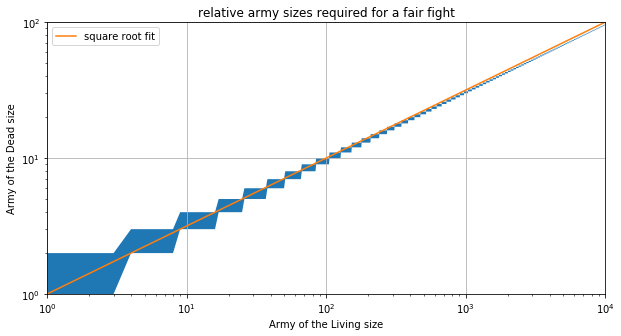

In [115]:
plt.figure(figsize=(10,5))
x = np.arange(Nhalf)
plt.fill_between(x, dcrit_lo, dcrit_hi)
plt.loglog(x, pow(x,0.5), "C1", label="square root fit")
plt.legend()
plt.xlim([1e0,1e4])
plt.ylim([1e0,1e2])
plt.xlabel("Army of the Living size")
plt.ylabel("Army of the Dead size")
plt.title("relative army sizes required for a fair fight")
plt.grid()
plt.show()

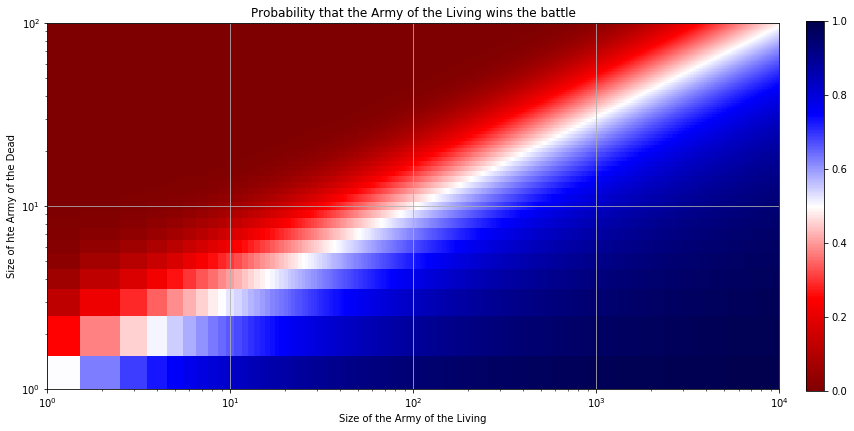

In [169]:
# plot the probability as a function of army sizes

plt.figure(figsize=(16,8))
im = plt.imshow(X[:int(N/2),:int(N/20)].T,origin='lower',cmap='seismic_r')
plt.xlim([1,1e4])
plt.ylim([1,1e2])
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Size of the Army of the Living')
plt.ylabel('Size of hte Army of the Dead')
plt.title('Probability that the Army of the Living wins the battle')
plt.colorbar(shrink=0.85,pad=0.03)
# plt.grid(which="both")
plt.grid()
plt.savefig('deadvsliving.png')